In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

In [3]:
df = pd.read_csv("results_ff.csv")

In [4]:
df

,Unnamed: 0,Accuracy,Train Losses
0,0,"[0.8612705252467967, 0.34193676649287497, 0.12...",[1.4141299641606482]
1,1,"[0.8445571179107567, 0.3397984378119983, 0.128...",[1.3991158809512854]
2,2,"[0.838203499061559, 0.341737368883331, 0.13082...",[1.3933314384723252]
3,3,"[0.8430044456761365, 0.3487327746096592, 0.123...",[1.4119533222507348]
4,4,"[0.8378600290384465, 0.35227289194779227, 0.11...",[1.4034401444210247]
5,5,"[0.8565342715838025, 0.33510564703179396, 0.12...",[1.4066410513425416]
6,6,"[0.8503499927781791, 0.33967661728709553, 0.12...",[1.4069313506849788]
7,7,"[0.8440249967019411, 0.3406876477035149, 0.130...",[1.4060058617456392]
8,8,"[0.8584430126976577, 0.3389785991187125, 0.112...",[1.3988389819860458]
9,9,"[0.8459141020583191, 0.3407729122068766, 0.127...",[1.406480593268167]


In [7]:
# Define the desired column order
column_names = ['MeanAbsoluteError', 'MeanAbsolutePercentageError', 'R2Score', 'MeanSquaredError', 'RootMeanSquaredError']
from ast import literal_eval
df = pd.concat([df, df['Accuracy'].apply(lambda x: pd.Series(literal_eval(x), index=column_names))], axis=1)
# Rearrange the columns
df = df[column_names]

In [10]:
df["MeanAbsolutePercentageError"] = df["MeanAbsolutePercentageError"].apply(lambda row : row*100 if row else row)

In [11]:
df

,MeanAbsoluteError,MeanAbsolutePercentageError,R2Score,MeanSquaredError,RootMeanSquaredError
0,0.861271,34.193677,0.121443,1.110641,1.053869
1,0.844557,33.979844,0.128833,1.083926,1.041118
2,0.838203,34.173737,0.130822,1.078016,1.038275
3,0.843004,34.873277,0.123515,1.094560,1.046212
4,0.837860,35.227289,0.118945,1.099636,1.048635
5,0.856534,33.510565,0.120854,1.095998,1.046899
6,0.850350,33.967662,0.122866,1.093216,1.045570
7,0.844025,34.068765,0.130675,1.085979,1.042103
8,0.858443,33.897860,0.112239,1.105887,1.051612
9,0.845914,34.077291,0.127015,1.088638,1.043378


In [34]:
from ast import literal_eval

# Define the desired column names
column_names = ['mean_absolute_error', 'mean_absolute_percentage_error', 'r2_score', 'mean_squared_error', 'rmse_score']

# Parse the string and create new columns with specified names
df = pd.concat([df, df['Accuracy'].apply(lambda x: pd.Series(literal_eval(x), index=column_names))], axis=1)


In [37]:
df.drop(["Train Losses","Accuracy","Unnamed: 0"],axis=1)

,mean_absolute_error,mean_absolute_percentage_error,r2_score,mean_squared_error,rmse_score
0,0.566548,0.213826,0.586018,0.523342,0.723424
1,0.564071,0.213295,0.582516,0.519444,0.720725
2,0.559475,0.206769,0.586891,0.512367,0.715798
3,0.567012,0.222480,0.572553,0.533799,0.730616
4,0.566226,0.218653,0.575423,0.529910,0.727949
5,0.571657,0.227755,0.563866,0.543711,0.737368
6,0.574331,0.211368,0.572565,0.532733,0.729886
7,0.579540,0.203754,0.571540,0.535242,0.731602
8,0.570992,0.214711,0.576479,0.527582,0.726349
9,0.564771,0.216256,0.578327,0.525839,0.725148


In [60]:
train_losses = []
for i in range(len(df["Train Losses"])):
    train_losses.append(np.array(ast.literal_eval(df["Train Losses"][i])))


In [61]:
train_losses

[array([1.35180938, 1.20175457, 1.15668511, 1.13609469, 1.12019992,
        1.11035144, 1.08864784, 1.09056723, 1.07460988, 1.06515706]),
 array([1.26035726, 1.12124109, 1.08033216, 1.05021572, 1.02099502,
        1.00882816, 0.98878837, 0.97894263, 0.96192378, 0.9487977 ]),
 array([1.26478362, 1.11989379, 1.0915128 , 1.07134867, 1.04588163,
        1.03890812, 1.02792835, 1.01877391, 1.01448512, 1.00337684]),
 array([1.28007233, 1.1489923 , 1.12172747, 1.09842408, 1.08071268,
        1.06347895, 1.05455685, 1.04495907, 1.03210592, 1.02318978]),
 array([1.32729077, 1.19106746, 1.14893782, 1.12600243, 1.09495676,
        1.08004868, 1.06631982, 1.05848622, 1.04176104, 1.04068947]),
 array([1.27201402, 1.13712144, 1.10569048, 1.0823499 , 1.06527519,
        1.04700589, 1.04130316, 1.0269779 , 1.0143795 , 1.00373793]),
 array([1.2571907 , 1.12599146, 1.0899843 , 1.06950998, 1.04255748,
        1.01845241, 1.00523782, 0.98630893, 0.97348368, 0.95908564]),
 array([1.24674594, 1.1120019 , 1.

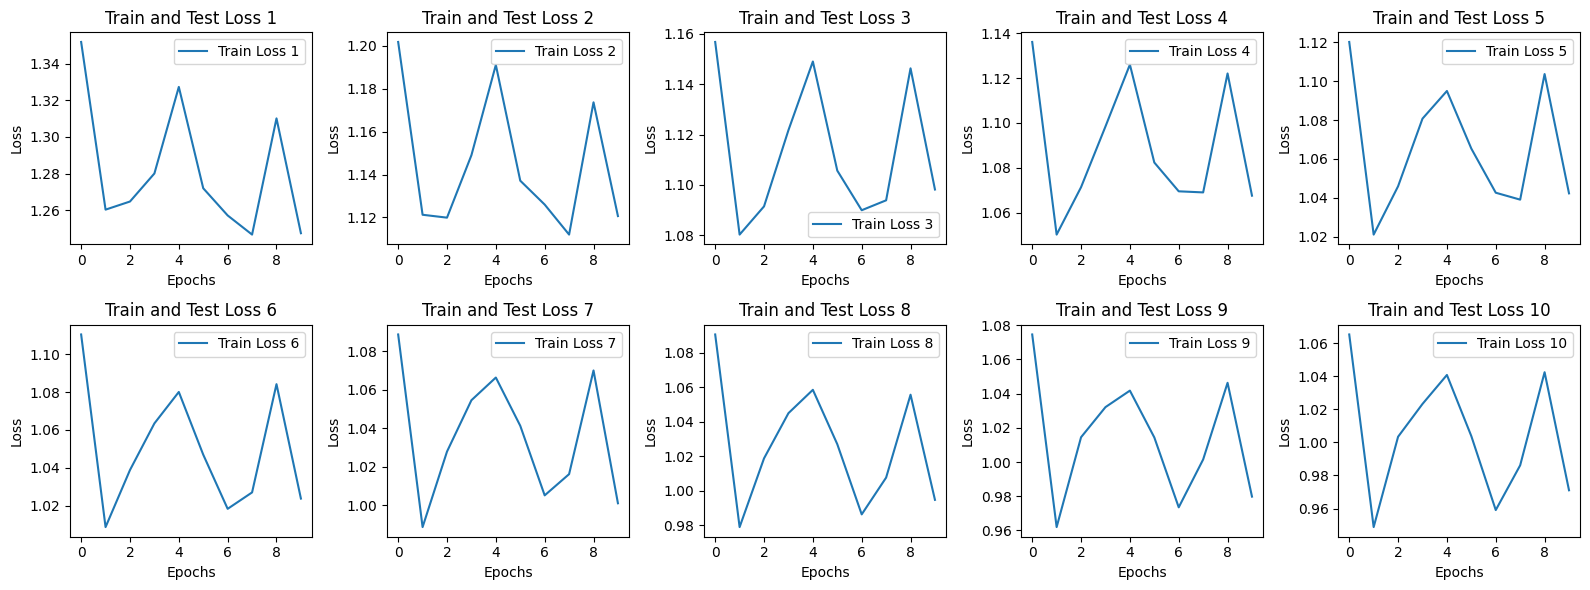

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
train_losses = np.array(train_losses)
test_losses = np.array(train_losses)

# Create a 2x5 grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(16, 6))

# Plot Train and Test Losses
for i in range(len(train_losses)):
    row = i // 5  # Determine the row (0 or 1)
    col = i % 5   # Determine the column (0 to 4)
    ax = axs[row, col]
    
    ax.plot(train_losses[:, i], label=f"Train Loss {i+1}")
    ax.set_xlabel("Epochs")  # X-axis title
    ax.set_ylabel("Loss")  # Y-axis title
    ax.set_title(f"Train and Test Loss {i+1}")
    ax.legend()

# Add some spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()